In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch

In [2]:
print(torch.cuda.is_available())

True


In [5]:
! pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121


Looking in indexes: https://download.pytorch.org/whl/cu121
     ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
     ------ --------------------------------- 0.9/5.7 MB 27.2 MB/s eta 0:00:01
     ------------ --------------------------- 1.8/5.7 MB 22.3 MB/s eta 0:00:01
     ----------------------- ---------------- 3.3/5.7 MB 26.1 MB/s eta 0:00:01
     --------------------------------- ------ 4.7/5.7 MB 27.3 MB/s eta 0:00:01
     ---------------------------------------- 5.7/5.7 MB 25.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
     ----------------- ---------------------- 1.8/4.1 MB 38.7 MB/s eta 0:00:01
     ----------------------------- ---------- 3.0/4.1 MB 38.9 MB/s eta 0:00:01
     ---------------------------------------- 4.1/4.1 MB 32.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/2.4 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.4 GB 46.4 MB/s eta 0:00:53
     ------------

  You can safely remove it manually.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))



Num GPUs Available:  0


In [8]:
import torch
print("CUDA available: ", torch.cuda.is_available())
print("CUDA version: ", torch.version.cuda)
print("Number of GPUs: ", torch.cuda.device_count())
print("Current GPU: ", torch.cuda.current_device())
print("GPU Name: ", torch.cuda.get_device_name(torch.cuda.current_device()))


CUDA available:  False
CUDA version:  None
Number of GPUs:  0


AssertionError: Torch not compiled with CUDA enabled

In [2]:
path = r"D:\JIO Institute\Capstone\Capstone_V2\ID_code_UnetR\Multiclass-Image-Segmentation-using-UNETR-in-TensorFlow\casa_data_new\train\labels\0.png"

In [3]:
img = Image.open(path)

In [7]:
im_array = np.array(img)
tensor = torch.from_numpy(im_array)

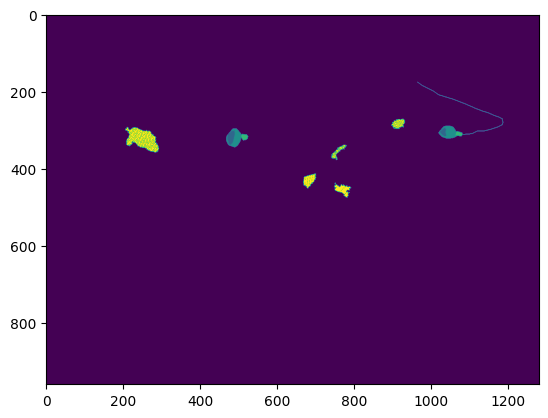

In [5]:
plt.imshow(im_array)

In [2]:
import cv2

def get_number_of_channels_cv2(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    channels = image.shape[2] if len(image.shape) == 3 else 1
    return channels

# Example usage
image_path = r"D:\JIO Institute\Capstone\Capstone_V2\ID_code_UnetR\Multiclass-Image-Segmentation-using-UNETR-in-TensorFlow\casa_data_new\train\labels\0.png"
channels = get_number_of_channels_cv2(image_path)
print(f"Number of channels in the image: {channels}")


Number of channels in the image: 1


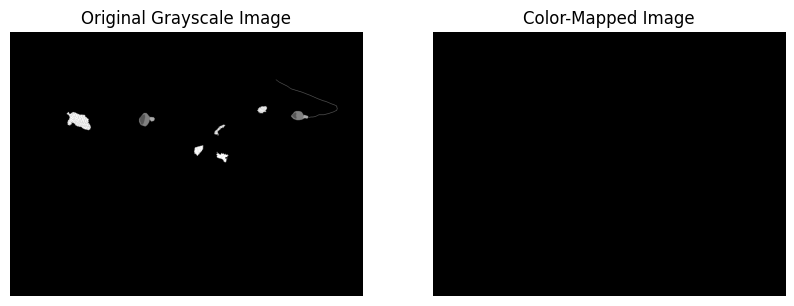

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define a colormap (mapping discrete values to RGB colors)
colormap = {
    0: [0, 0, 0],       # background - black
    1: [0, 153, 255],   # class 1 - blue
    2: [102, 255, 153], # class 2 - green
    3: [0, 204, 153],   # class 3 - teal
    4: [255, 255, 102], # class 4 - yellow
    5: [255, 255, 204], # class 5 - light yellow
    6: [255, 153, 0]    # class 6 - orange
    # Add more classes if necessary
}

def convert_to_discrete_classes(image, num_classes):
    """Convert grayscale image to discrete classes based on intensity intervals.
    
    Args:
        image (np.ndarray): Grayscale image with intensity values from 0 to 255.
        num_classes (int): Number of discrete classes.
        
    Returns:
        np.ndarray: Image with discrete class values.
    """
    # Calculate the interval size
    interval_size = 255 / num_classes
    
    # Apply the transformation to convert intensities to discrete classes
    discrete_image = (image // interval_size).astype(np.uint8)
    
    # Ensure the maximum class value is num_classes - 1
    discrete_image[discrete_image == num_classes] = num_classes - 1
    
    return discrete_image

def apply_colormap(image, colormap):
    """Apply colormap to an image with discrete class values.
    
    Args:
        image (np.ndarray): Image with discrete class values.
        colormap (dict): Dictionary mapping class values to RGB colors.
        
    Returns:
        np.ndarray: Color-mapped image.
    """
    height, width = image.shape
    color_image = np.zeros((height, width, 3), dtype=np.uint8)
    
    for key, color in colormap.items():
        color_image[image == key] = color
    
    return color_image

# Example usage
# Read a grayscale image

grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert the grayscale image to discrete classes
num_classes = 7
discrete_image = convert_to_discrete_classes(grayscale_image, num_classes)

# Apply the colormap to the discrete class image
color_mapped_image = apply_colormap(discrete_image, colormap)

# Display the original and color-mapped images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Color-Mapped Image")
plt.imshow(color_mapped_image)
plt.axis('off')

plt.show()

# Optionally save the color-mapped image



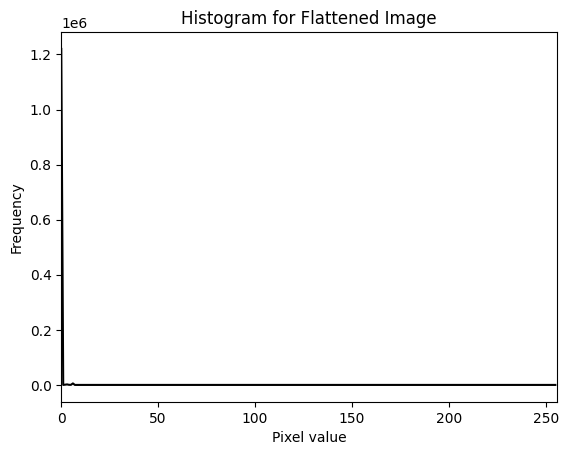

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram_from_flattened_array(image_array):
    """Plot the histogram of the flattened image array.
    
    Args:
        image_array (np.ndarray): Image array that will be flattened and used to plot the histogram.
    """
    # Flatten the image array
    flattened_array = image_array.flatten()
    
    # Calculate histogram
    histogram, bin_edges = np.histogram(flattened_array, bins=256, range=(0, 256))
    
    # Plot histogram
    plt.plot(bin_edges[0:-1], histogram, color='black')
    plt.xlim([0, 256])
    plt.title('Histogram for Flattened Image')
    plt.xlabel('Pixel value')
    plt.ylabel('Frequency')
    plt.show()

# Example usage
# Create a random grayscale image array for demonstration (Replace this with your actual image array)
image_array = tensor.unsqueeze(0).numpy()
plot_histogram_from_flattened_array(image_array)

# Create a random grayscale image array for demonstration (Replace this with your actual image array)

# print(image_array.shape) 
# plot_histogram_from_grayscale_array(image_array)


In [16]:
image_array.flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)